In [1]:
start_links = ['https://en.wikipedia.org/wiki/Antiderivative',
'https://en.wikipedia.org/wiki/Hyperbola',
'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)',
'https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)',
'https://en.wikipedia.org/wiki/Parabola',
'https://en.wikipedia.org/wiki/Logarithm',
'https://en.wikipedia.org/wiki/Harmonic_progression',
'https://en.wikipedia.org/wiki/De_Morgan%27s_laws',
'https://en.wikipedia.org/wiki/Even_and_odd_functions',
'https://en.wikipedia.org/wiki/Floor_and_ceiling_functions',
'https://en.wikipedia.org/wiki/Transpose',
'https://en.wikipedia.org/wiki/Chord_(geometry)',
'https://en.wikipedia.org/wiki/Inverse_trigonometric_functions',
'https://en.wikipedia.org/wiki/Parametric_equation',
'https://en.wikipedia.org/wiki/Director_circle',
'https://en.wikipedia.org/wiki/Coplanarity',
'https://en.wikipedia.org/wiki/Centroid',
'https://en.wikipedia.org/wiki/Altitude_(triangle)',
'https://en.wikipedia.org/wiki/Function_composition',
'https://en.wikipedia.org/wiki/Periodic_function',
'https://en.wikipedia.org/wiki/Dihedral_angle',
'https://en.wikipedia.org/wiki/Diophantine_geometry',
'https://en.wikipedia.org/wiki/Sampling_(statistics)#Simple_random_sampling',
'https://en.wikipedia.org/wiki/Minimax',
'https://en.wikipedia.org/wiki/Quantile_function',
'https://en.wikipedia.org/wiki/Karl_Weierstrass',
'https://en.wikipedia.org/wiki/Augustin-Louis_Cauchy']

start_labels = [3,3,3,1,2,1,1,1,1,1,2,1,3,2,2,2,1,3,3,2,3,0,0,0,0,0,0]
# 1 is beginner, 2 is intermediate, 3 is advanced

In [2]:
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen

In [3]:
class Node:
  def __init__(self,link,text,label=None):
    self.id = None
    self.link = link # to store the link 
    self.label = label # to store the label
    self.text = text # to store the text
    self.neighbours = [] # to store the neighbours
    # to store the labels that come to this node in propagation step
    # and then assign to it the most frequent one
    self.label_options = [] 
    self.embedding = None # we will assign this later

    self.name = link.split('/')[-1] # can be useful if we are displaying the nodes
    # neighbours is a list of nodes

unique_links = {} # to store all unique links and their nodes

In [ ]:
# !pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=9e8877ab59d3f0b404a770d34b136bbf420aba8030bce944e345800cdaee9142
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [4]:
import re
# some cleaning of the text data so as to get good embeddings
CLEANR = re.compile('<.*?>') 
CLEANB = re.compile('{.*?}')
CLEANN = re.compile('\n')
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  cleantext = re.sub(CLEANB,'',cleantext)
  cleantext = re.sub(CLEANN,'',cleantext)
  cleantext = re.sub('}',' ',cleantext)
  return cleantext

In [5]:
r = requests.get(start_links[0])
soup = BeautifulSoup(r.content)
para = soup.find_all('p')
#cleanhtml(str(para[5]))
#str(para[1])

In [ ]:
cleanhtml((" ").join([str(p) for p in soup.find_all('p')]))

'In calculus, an antiderivative, inverse derivative, primitive function, primitive integral or indefinite integral[Note 1] of a function f is a differentiable function F whose derivative is equal to the original function f. This can be stated symbolically as F\'  = f.[1][2] The process of solving for antiderivatives is called antidifferentiation (or indefinite integration), and its opposite operation is called differentiation, which is the process of finding a derivative. Antiderivatives are often denoted by capital Roman letters such as F and G. Antiderivatives are related to definite integrals through the second fundamental theorem of calculus: the definite integral of a function over a closed interval where the function is Riemann integrable is equal to the difference between the values of an antiderivative evaluated at the endpoints of the interval. In physics, antiderivatives arise in the context of rectilinear motion (e.g., in explaining the relationship between position, velocit

In [ ]:
para[5]

<p>In <a href="/wiki/Physics" title="Physics">physics</a>, the integration of <a href="/wiki/Acceleration" title="Acceleration">acceleration</a> yields <a href="/wiki/Velocity" title="Velocity">velocity</a> plus a constant. The constant is the initial velocity term that would be lost upon taking the derivative of velocity, because the derivative of a constant term is zero. This same pattern applies to further integrations and derivatives of motion (position, velocity, acceleration, and so on).<sup class="reference" id="cite_ref-:1_4-1"><a href="#cite_note-:1-4">[3]</a></sup>
</p>

In [ ]:
# helper function
# def wiki_to_text(link):
#     source = urlopen(link)
#     soup = BeautifulSoup(source,'lxml')
#     paras = []
#     for paragraph in soup.find_all('p'):
#       paras.append(str(paragraph.text))

#     heads = []
#     for head in soup.find_all('span', attrs = {'mw-headline'}):
#       heads.append(str(head.text))

#     text = [val for pair in zip(paras, heads) for val in pair]
#     text = ' '.join(text)
#     text = re.sub(r"\[.*?\]+", '', text)
#     text = text.replace('\n','')
#     return text

In [7]:
# creating and storing initial nodes
start_soups = [BeautifulSoup(requests.get(lnk).content) for lnk in start_links]
start_nodes = [Node(lnk,cleanhtml((" ").join([str(p) for p in soup.find_all('p')])),lbl) for lnk,soup,lbl in zip(start_links,start_soups,start_labels)]
for n in start_nodes:
  unique_links[n.link] = n

# helper function
def getLinks(link):
  # returns a list of all links present on the page of the passed link
  r = requests.get(link)
  soup = BeautifulSoup(r.content, 'html5lib')
  return ['https://en.wikipedia.org/'+i['href'] for i in soup.find_all('a',href=True) if i['href'].startswith("/wiki")]

In [10]:
import random
bfs_queue = [] # Queue to carry out bfs

# add the initial nodes to the queue
for s in start_nodes:
  bfs_queue.append(s) 

# testing on 1000 counts first -----------------> 10 minutes time, 76,162 nodes collected
# testing on 1500 counts first -----------------> 13 minutes time, 1,26,584 nodes collected
count = 3 # took 5 minutes for 5 count, this wiki_to_text takes time 🙄, I could just collect 874 nodes
for node in random.sample(bfs_queue,5):

  count-=1 # testing
  if count==0:break # testing
  #if len(bfs_queue)==100000:break

  links = getLinks(node.link)
  neighbours = [] # store neighbours of the node
  for lnk in links:
    if lnk in unique_links:
      # Do nothing if link already explored
      #print("Already present")
      pass
    else:
      r = requests.get(lnk)
      soup = BeautifulSoup(r.content)
      new = Node(lnk,cleanhtml((" ").join([str(p) for p in soup.find_all('p')])))
      bfs_queue.append(new) # add this node to queue
      unique_links[lnk] = new # also add to unique_links dictionary
    # here I am ensuring that no link is repeated but neighbours can be repeated
      
  for lk in links:
    neighbours.append(unique_links[lk])
  node.neighbours = neighbours

In [11]:
for e,n in enumerate(bfs_queue):
  n.id = e+1

In [12]:
# helper function
def stat():
  global bfs_queue,unique_links
  print("Length of bfs_queue:",len(bfs_queue))
  print("Length of unique_links:",len(unique_links))

In [13]:
stat()

Length of bfs_queue: 437
Length of unique_links: 437


In [14]:
# Using library to get embeddings of document as my own implementation is taking too much time
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc.text.split(), [i]) for i, doc in enumerate(bfs_queue)]
model = Doc2Vec(documents, vector_size=300, window=2, min_count=1, workers=4)

In [ ]:
#model.wv.most_similar(['integration','of','function'])

[('has', 0.9994925260543823),
 ('or', 0.9994825720787048),
 ('that', 0.9994738101959229),
 ('a', 0.9994684457778931),
 ('the', 0.9994664192199707),
 ('and', 0.9994654655456543),
 ('In', 0.9994615316390991),
 ('for', 0.99946129322052),
 ('in', 0.9994605779647827),
 ('to', 0.9994600415229797)]

In [ ]:
import numpy as np
# def mostSimilarSentence(given_sentence):
#   myvec = model.infer_vector(given_sentence.split())
#   #print(myvec)
#   mind = -np.Inf
#   mins = None
#   for d in documents:
#     vec = model.infer_vector(d[0])
#     dot = np.dot(vec,myvec)
#     if dot>mind:
#       mind = dot
#       mins = (" ").join(d[0])
#   return mind,mins

In [ ]:
#documents[0][0] , is a list

In [15]:
for node in bfs_queue:
  node.embedding = model.infer_vector(node.text.split())
# took 12 seconds for 874 nodes
# 1 second for 27 nodes

In [18]:
import pandas as pd
pages = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/Wikipedia/pages.csv")
df = pages.copy()
for n in bfs_queue:
  if n.label == None:
    n.label = df.loc[df['Link']==n.link]['Label'].values[0]

In [ ]:
import numpy as np
check = bfs_queue[0]
print(check.link,check.label)
m = 0
j = None
for n in bfs_queue:
  if n!=check:
    if np.dot(n.embedding,check.embedding)>m:
      m = np.dot(n.embedding,check.embedding)
      j = n
print(j.link,j.label,m)

# here we have found the most similar page to Antiderivative in this subgraph

# using this embedding and the cosine similarity we can classify the unlabeled nodes

https://en.wikipedia.org/wiki/Antiderivative 3
https://en.wikipedia.org//wiki/Linearity_of_integration None 62.79174


In [22]:
# Generating query for Neo4j visualization

st = "CREATE "

for h in bfs_queue:
  st+="(n"+str(h.id)+":NODE{link:'"+h.link+"'"+", label:'"+str(h.label)+"'}"+"),"+"\n"
st = st.rstrip(",")
st+="\n"
#print(st)
rel = 0
for n in bfs_queue:
  for nn in n.neighbours:
    rel+=1
    st+="(n"+str(nn.id)+")"+"-[r"+str(rel)+":NEIGHBOR_OF]->"+"(n"+str(n.id)+"),"+"\n"
st = st.rstrip(",")
st+=";"
print(st)

CREATE (n1:NODE{link:'https://en.wikipedia.org/wiki/Antiderivative', label:'3'}),
(n2:NODE{link:'https://en.wikipedia.org/wiki/Hyperbola', label:'3'}),
(n3:NODE{link:'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)', label:'3'}),
(n4:NODE{link:'https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)', label:'1'}),
(n5:NODE{link:'https://en.wikipedia.org/wiki/Parabola', label:'2'}),
(n6:NODE{link:'https://en.wikipedia.org/wiki/Logarithm', label:'1'}),
(n7:NODE{link:'https://en.wikipedia.org/wiki/Harmonic_progression', label:'1'}),
(n8:NODE{link:'https://en.wikipedia.org/wiki/De_Morgan%27s_laws', label:'1'}),
(n9:NODE{link:'https://en.wikipedia.org/wiki/Even_and_odd_functions', label:'1'}),
(n10:NODE{link:'https://en.wikipedia.org/wiki/Floor_and_ceiling_functions', label:'1'}),
(n11:NODE{link:'https://en.wikipedia.org/wiki/Transpose', label:'2'}),
(n12:NODE{link:'https://en.wikipedia.org/wiki/Chord_(geometry)', label:'1'}),
(n13:NODE{link:'https://en.wikipedi

In [ ]:
############################################################## Do by above method #########################################################

In [24]:
st = "CREATE "

for h in bfs_queue:
  st+="(n"+str(h.id)+":NODE"+str(h.label)+"{link:'"+h.link+"'"+"}"+"),"+"\n"
st = st.rstrip(",")
st+="\n"
#print(st)
rel = 0
for n in bfs_queue:
  for nn in n.neighbours:
    rel+=1
    st+="(n"+str(nn.id)+")"+"-[r"+str(rel)+":NEIGHBOR_OF]->"+"(n"+str(n.id)+"),"+"\n"
st = st.rstrip(",")
st+=";"
print(st)

CREATE (n1:NODE3{link:'https://en.wikipedia.org/wiki/Antiderivative'}),
(n2:NODE3{link:'https://en.wikipedia.org/wiki/Hyperbola'}),
(n3:NODE3{link:'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)'}),
(n4:NODE1{link:'https://en.wikipedia.org/wiki/Vector_(mathematics_and_physics)'}),
(n5:NODE2{link:'https://en.wikipedia.org/wiki/Parabola'}),
(n6:NODE1{link:'https://en.wikipedia.org/wiki/Logarithm'}),
(n7:NODE1{link:'https://en.wikipedia.org/wiki/Harmonic_progression'}),
(n8:NODE1{link:'https://en.wikipedia.org/wiki/De_Morgan%27s_laws'}),
(n9:NODE1{link:'https://en.wikipedia.org/wiki/Even_and_odd_functions'}),
(n10:NODE1{link:'https://en.wikipedia.org/wiki/Floor_and_ceiling_functions'}),
(n11:NODE2{link:'https://en.wikipedia.org/wiki/Transpose'}),
(n12:NODE1{link:'https://en.wikipedia.org/wiki/Chord_(geometry)'}),
(n13:NODE3{link:'https://en.wikipedia.org/wiki/Inverse_trigonometric_functions'}),
(n14:NODE2{link:'https://en.wikipedia.org/wiki/Parametric_equation'}),
(

In [25]:
len(bfs_queue)

437

In [27]:
# Implementing GNN
import numpy as np
initial_embedding_matrix = np.stack([n.embedding for n in bfs_queue])
# We will update this matrix in subsequent passes

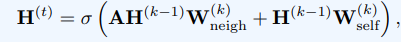

In [28]:
initial_embedding_matrix

array([[ 0.06638414, -0.2866605 , -0.12929122, ...,  0.06957521,
         0.6415759 ,  0.670869  ],
       [ 0.713002  , -1.4152358 , -0.6512912 , ...,  0.35884568,
         1.4448406 ,  1.1701587 ],
       [ 0.31630933, -0.4885309 , -0.10898053, ...,  0.30732152,
         0.40860137,  0.5878364 ],
       ...,
       [ 0.49651578, -0.4387598 , -0.15660518, ...,  0.28429177,
         0.8203162 ,  0.70391506],
       [ 0.03698523, -0.0184543 , -0.0134409 , ...,  0.00544398,
        -0.00185403,  0.02470144],
       [ 0.09444778, -0.03717188, -0.01494965, ...,  0.03292532,
         0.07118396,  0.04680646]], dtype=float32)